In [1]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib widget
%matplotlib inline

In [2]:
svec = loadtxt("../Data/3x3-qe/n.cell")
rvec = svec/3
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))


In [44]:
rvec.T

array([[ 3.48549512, -1.74274756,  0.        ],
       [ 0.        ,  3.01852732,  0.        ],
       [ 0.        ,  0.        ,  6.13816667]])

In [79]:
n_data = loadtxt("../Data/3x3-qe/n.pos")
m_data = loadtxt("../Data/3x3-qe/p2.pos")

n_atom = dot(n_data,svec)
# n_atom = n_atom-n_atom[0]
n_atom = n_atom-n_atom[0]+rvec[0]/2+rvec.T[1]/(sqrt(3)*2)
m_atom = dot(m_data,svec)
m_atom = m_atom-m_atom[0]
m_atom += average(n_atom[:9]-m_atom[:9],axis=0)

u = around(m_atom - n_atom,8)

In [80]:
rvec

array([[ 3.48549512,  0.        ,  0.        ],
       [-1.74274756,  3.01852732,  0.        ],
       [ 0.        ,  0.        ,  6.13816667]])

In [81]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
#     plt.scatter(0,0,c="blue",s=s2,label="Nb")
#     plt.scatter(0,0,c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.scatter(n_atom[:9].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:9].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[9:18].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[9:18].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
            
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            for k in [0,6,8]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
            for k in [1,5,2]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
            for k in [3,4,7]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
#     plt.title("Nb Displacement")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
    plt.savefig("../Plot/3x3_p2_nb.png",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

No handles with labels found to put in legend.


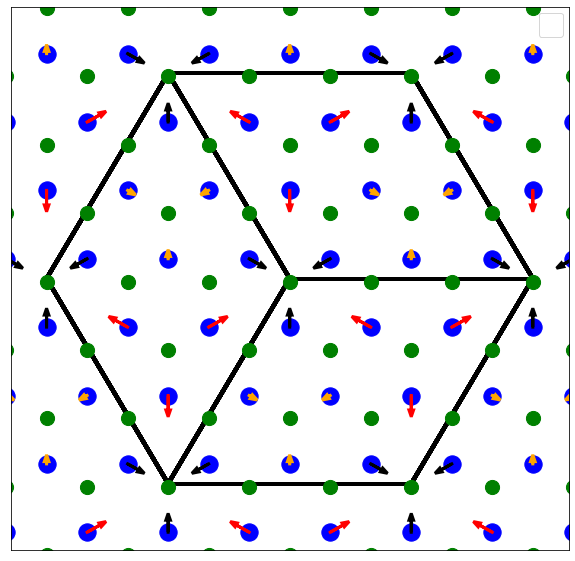

In [82]:
plot_lattice()

In [83]:
utilde = dot(exp(-1j*dot(n_atom[:9],qvec.T)).T,u[:9])

In [84]:
for i in utilde:
    print(arctan(imag(i[0])/real(i[0]))/pi*180,arctan(imag(i[1])/real(i[1]))/pi*180)

68.67470585679742 68.62267420930391
13.614051876032477 76.69996914582096
68.70506270046918 68.70144169141501


In [85]:
for i in real(utilde):
    print(norm(i))

0.06481044327441482
0.04097274584259924
0.06471831255500667


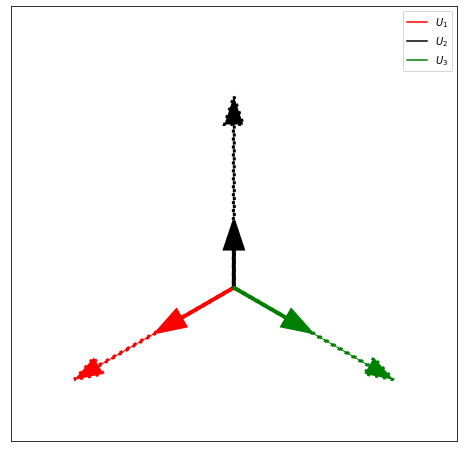

In [87]:
fig = plt.figure(figsize=(8,8))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)

colors=["red","black","green","red","black","green"]


for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))



# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
# plt.savefig("../Plot/3x3_p2_cdw.png",bbox_inches='tight')
plt.show()

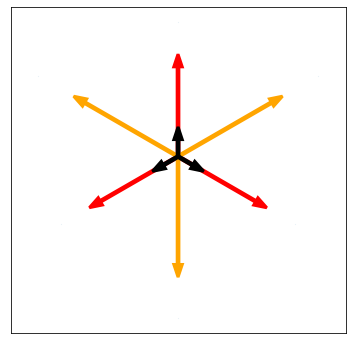

In [86]:
fig = plt.figure(figsize=(6,6))
hw=0.005
plt.scatter(u[:9].T[0]*1.5,u[:9].T[1]*1.5,s=0.001)


for k in [0,6,8]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="red",head_width=hw)   
for k in [1,5,2]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="orange",head_width=hw)   
for k in [3,4,7]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="black",head_width=hw)   
    
# plt.plot(0,0,c="black",label=round(norm(u[3][:2]),3))
# plt.plot(0,0,c="red",label=round(norm(u[0][:2]),3))
# plt.plot(0,0,c="orange",label=round(norm(u[1][:2]),3))
# plt.legend()
plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 2")
plt.savefig("../Plot/3x3_p2_nb_mod.png",bbox_inches='tight')
plt.show()


In [17]:
utilde = dot(exp(-1j*dot(n_atom[:9],qvec.T)).T,u[:9])

In [18]:
around(utilde,3)

array([[-0.152+0.023j, -0.088+0.013j,  0.   +0.j   ],
       [ 0.   +0.j   , -0.065+0.166j,  0.   +0.j   ],
       [-0.056+0.144j,  0.032-0.083j,  0.   +0.j   ]])

In [19]:
for i in around(utilde,3):
    print(norm(i))

0.1776119365358083
0.17827226368675528
0.1782834821288837


In [20]:
for i in real(utilde):
    print(norm(i))

0.17608213967097291
0.06481491555352249
0.06497267984146692


In [21]:
for i in imag(utilde):
    print(norm(i))

0.026814924862188352
0.16589090252352023
0.1659301066511753


In [25]:
utilde = dot(around(exp(-1j*dot(around(n_atom[:9],3),around(concatenate([qvec,-qvec]),3).T).T),3),around(u[:9],3))

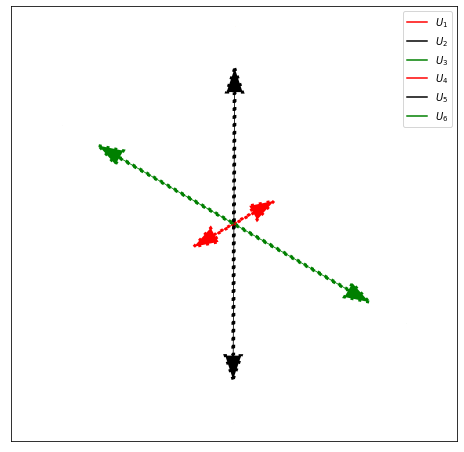

In [27]:
fig = plt.figure(figsize=(8,8))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green","red","black","green"]
    

for i in range(6):
#     plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
#     plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
# plt.savefig("../Plot/3x3_p2_cdw.png",bbox_inches='tight')
plt.show()